## Child Phase 4 (Modeling): Random Forest

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 16](https://data-science.training/kapitel-16/)
* Datum: 23.03.2023

Versionen 3, 4, 5 und 6

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# NumPy Paket (Package) importieren
#  Mehrdimensionale Datenstrukturen (Vektoren, Matrizen, Tensoren, Arrays), Lineare Algebra
#  https://numpy.org/doc/
import numpy as np
# Pyplot Modul der Matplot Bibliothek (Library) importieren
#  Mathematische grafische Daten-Visualisierungen
#  https://matplotlib.org/contents.html
import matplotlib.pyplot as plt
# Klassen und Funktionen der scikit-learn Module importieren
#  Maschinelles Lernen, Algorithmen
#  https://scikit-learn.org/stable/modules/classes.html
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# Pickle Paket (Package) importieren
#  Objekte serialisieren
#  https://docs.python.org/3/library/pickle.html
import pickle as pk
# Eigene Module importieren
#  zur Bewertung der Modelle
import sys
sys.path.append('../00_DST_Module/')
import dst_score_functions as sf

In [5]:
# Datenversion festlegen: 3, 4, 5, 6
version  = 6
# Modell-Abkürzung festlegen: rf = Randon Forest
shortcut = 'rf'

In [6]:
# Trainingsdaten als Pandas Data Frame (df) aus Excel-Datei laden
#  (KNIME: "Excel Reader")
filename = '../../data/titanic/age/training_v' + str(version) + '.xlsx'
df_train = pd.read_excel(filename)

In [7]:
# Beschreibende Attribute extrahieren (ohne Child)
X = df_train.iloc[:,0:15].values
# Klassenattribut (Child) extrahieren
y = df_train.iloc[:,15].values

In [8]:
# Stratifizierte k-fache Kreuzvalidierung (mit k=10)
#  (KNIME: "X-Partitioner")
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [9]:
# Modell auswählen
#  (KNIME: "XYZ Learner")
model = RandomForestClassifier(random_state=0)
print(model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [10]:
# Ergebnisse berechnen und ausgeben
#  (KNIME: "XYZ Learner", "XYZ Predictor", "X-Aggregator", "Scorer")
scores = sf.dst_scores(model, X, y, cv=skf)
sf.dst_print_scores(scores)


Confusion Matrix

* TN (True  Negatives) : 758
* TP (True  Positives) : 758
* FN (False Negatives) : 4
* FP (False Positives) : 4

Gütemaße

* Genauigkeit  (Accuracy)    :   99,47 %
* Spezifität   (Specificity) :   99,48 %
* Sensitivität (Sensitivity) :   99,47 %
* Präzision    (Precision)   :   99,48 %
* Recall       (Recall)      :   99,47 %
* F-Maß        (F Score)     :   99,47 %
* AURC         (AURC)        :   99,97 %
* LogLoss      (LogLoss)     :    0,024

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  99,60 %


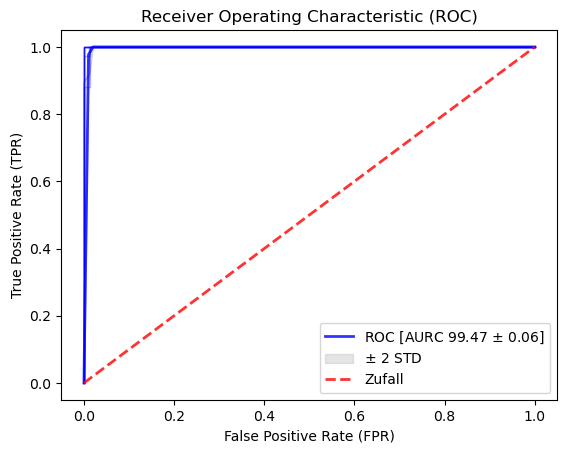

In [11]:
# Receiver Operating Characteristic (ROC) zeichnen
#  (KNIME: "ROC Curve")
sf.dst_roc(model, X, y, cv=skf)

In [12]:
# Modell mit allen Daten trainieren
#  (KNIME: "XYZ Learner")
model.fit(X, y)

RandomForestClassifier(random_state=0)

In [13]:
# Trainiertes Modell speichern
#  (KNIME: "PMML Writer")
filename = '../../models/titanic/age/' + shortcut + '_v' + str(version)
pk.dump(model, open(filename, 'wb'))

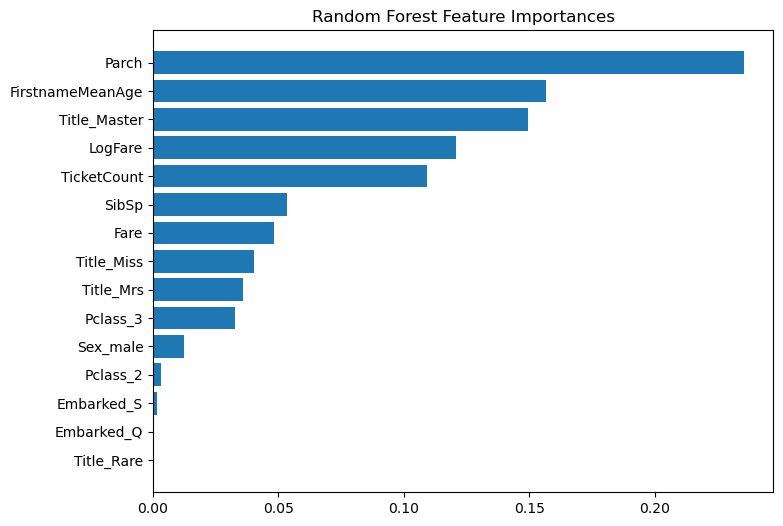

In [14]:
# Horizontales Balkendiagramm mit der "Feature Importance (fi)"
#  (KNIME: "Random Forest Learner")
#
# Extraktion der Feature-Namen und -Werte
names  = df_train.columns.values
names  = np.delete(names, 15) # Spaltennamen Child entfernen
values = model.feature_importances_
#
# Data Frame aus dem Dictionary der Namen und Werte erstellen und aufsteigend sortieren
df_fi = pd.DataFrame({'names': names, 'values': values})
df_fi = df_fi.sort_values('values')
#
# Horizontales Balkendiagramm erstellen
plt.figure(figsize=(8,6))
plt.barh('names', 'values', data=df_fi)
plt.title('Random Forest Feature Importances')
plt.show()

In [15]:
display(df_fi) 

,names,values
14,Title_Rare,0.000203
9,Embarked_Q,0.000430
10,Embarked_S,0.001684
6,Pclass_2,0.003086
8,Sex_male,0.012136
7,Pclass_3,0.032843
13,Title_Mrs,0.035859
12,Title_Miss,0.040153
2,Fare,0.048372
0,SibSp,0.053234


## Ergebnisse

#### Version 3: Ungleichgewicht

Confusion Matrix

* TN (True  Negatives) : 757
* TP (True  Positives) : 68
* FN (False Negatives) : 6
* FP (False Positives) : 5

Gütemaße

* Genauigkeit  (Accuracy)    :   98,68 %
* Spezifität   (Specificity) :   99,35 %
* Sensitivität (Sensitivity) :   91,79 %
* Präzision    (Precision)   :   93,39 %
* Recall       (Recall)      :   91,79 %
* F-Maß        (F Score)     :   92,23 %
* AURC         (AURC)        :   99,68 %
* LogLoss      (LogLoss)     :    0,039

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  95,99 %

#### Version 4: Equal Size Sampling

Confusion Matrix

* TN (True  Negatives) : 69
* TP (True  Positives) : 74
* FN (False Negatives) : 0
* FP (False Positives) : 5

Gütemaße

* Genauigkeit  (Accuracy)    :   96,67 %
* Spezifität   (Specificity) :   93,21 %
* Sensitivität (Sensitivity) :  100,00 %
* Präzision    (Precision)   :   94,39 %
* Recall       (Recall)      :  100,00 %
* F-Maß        (F Score)     :   96,97 %
* AURC         (AURC)        :   99,82 %
* LogLoss      (LogLoss)     :    0,099

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  96,96 %

#### Version 5: Bootstrap

Confusion Matrix

* TN (True  Negatives) : 757
* TP (True  Positives) : 762
* FN (False Negatives) : 0
* FP (False Positives) : 5

Gütemaße

* Genauigkeit  (Accuracy)    :   99,67 %
* Spezifität   (Specificity) :   99,35 %
* Sensitivität (Sensitivity) :  100,00 %
* Präzision    (Precision)   :   99,35 %
* Recall       (Recall)      :  100,00 %
* F-Maß        (F Score)     :   99,67 %
* AURC         (AURC)        :  100,00 %
* LogLoss      (LogLoss)     :    0,013

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  99,67 %

#### Version 6: SMOTE

Confusion Matrix

* TN (True  Negatives) : 758
* TP (True  Positives) : 758
* FN (False Negatives) : 4
* FP (False Positives) : 4

Gütemaße

* Genauigkeit  (Accuracy)    :   99,47 %
* Spezifität   (Specificity) :   99,48 %
* Sensitivität (Sensitivity) :   99,47 %
* Präzision    (Precision)   :   99,48 %
* Recall       (Recall)      :   99,47 %
* F-Maß        (F Score)     :   99,47 %
* AURC         (AURC)        :   99,97 %
* LogLoss      (LogLoss)     :    0,024

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  99,60 %
